# **Implementation: Solving Job- Shop Scheduling Problems with fuzzy processing times and fuzzy due dates**




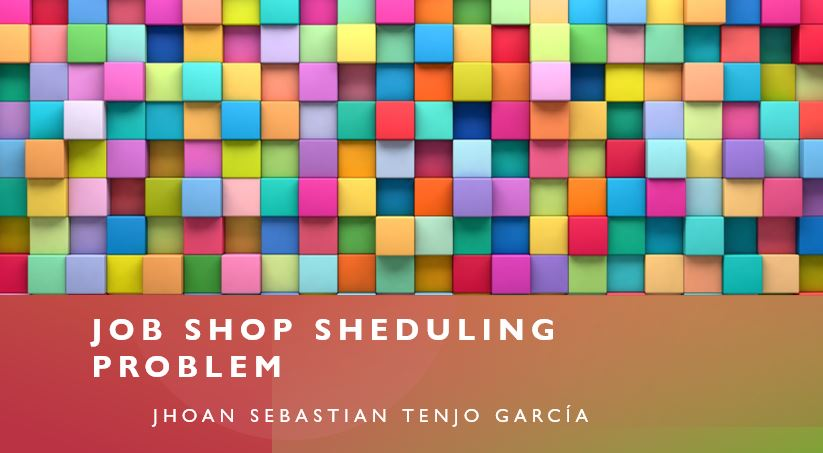

In [ ]:
Image('Portada.JPG', width=1000)

# Introducción:
<p align='justify'>  El problema conocido como Sheduling o Asignación ha sido trabajado por diversos autores a lo largo del tiempo. Ver [1] , [2] y [3] , particularmente existen dos grandes exponentes de este problema. Los problemas $Flow \ Shop$ y los problemas $Job \ Shop$. Ambos son muy populares en tareas referentes a toma de decisiones y planteación de la producción. El problema de interés en este proyecto es $Job \ Shop$ debido a que tiene una alta relación con los sistemas productivos en Colombia. Con un ejemplo base se establecerá la diferencia entre estos dos tipos de problema.

><p align='justify'>Suponga que se está trabajando en una linea de producción masiva de una empresa de gaseosas. Este es un representante de $Flow \ Shop$ porque en el momento de producir bebida carbonadata los procesos siguen un patrón de linea, es decir el producto inicia en una etapa 1 ( lavado de botella ) Luego continúa a etapa 2 ( Secado) Etapa 3 ( Llenado ) Etapa 4 ( Colocación de tapa) Etapa 5 ( Embalaje). Si bien hay variedad de productor, cuando se estudia al detalle, muchos de estos sistemas se simplifican porque la selección y combinatoria solo depende del tipo y cantidad de producto en principio. Los sistemas $Jop \ Shop$ son mucho más volátiles, presentan más cuellos de botella y variabilidad. La razón es que este tipo de sistemas no tienen secuencias fijas. Piense en un taller de mecanizado, ¿ Qué máquinas encuentra?. Por ejemplo: Tornos , Tornos CNC, Fresas, Cizallas, Prensas, Taladros. Si se quiere fabricar un piñón, puede que la ruta de este sea

$\hspace{4cm} Torno_{1} \longmapsto Fresa_2 \longmapsto Taladro_1 \longmapsto Torno_2$ 

>Podría suceder que para diseñar otro producto, por ejemplo un engranaje las restricciones de producción vengan dadas por.

$\hspace{2 cm} Fresa_{1} \longmapsto Fresa_2 \longmapsto Taladro_1 \longmapsto Torno_1 \longmapsto Torno_2 \longmapsto Cizalla$. 

><p align='justify'>Se da la posibilidad de algunas máquinas ocupadas trabajando mientras el producto se encuentra en espera a ser procesado. Esto es lo que se conoce como tiempo de ocio. Los entornos $Job \ Shop$ surgen no por algún tipo de desorden en el sistema, sino por una naturaleza inherente a los procesos. Influye también el hecho de que los sistemas tipo taller en Colombia normalmente no cuentan con altas tecnologías de automatización, esto también influye en el tipo de sistema. Con esto se quiere mostrar que un sistema $ Job \ Shop $ está dentro de un contexto inmediato y de allí su motivación de estudio.

><p align='justify'>El enfoque clásico del problema de Scheduling utiliza los $Due \ Dates$ o tiempos de entrega y los tiempos de procesamiento como variables deterministícas. Sin embargo en [4] como autor presento una propuesta de hacer uso de conjuntos difusos para modelar estas variables e intorducir incertidumbre en el modelo. La presente implementación en Python busca diseñar el algoritmo iterativo con tiempos difusos presentado en [4], pero para ello se realizará una progresión por distintas heurísitcas y acotaciones del problema. </p> 

*[1]Johnson, L.A., Montgomery, D.C.: Operations Research in Production Planning,
Scheduling and Inventory Control. John Wiley & Sons (1974)*

*[2] Pinedo, M.L.: Scheduling: Theory, Algorithms, and Systems 5th Ed. Springer-
Verlag (2016)*

*[3] Sipper, D., Bulfin, R.: Production: Planning, Control and Integration. McGraw-
Hill College (1997)*

*[4] Bustos-Tellez, C. A., Tenjo-García, J. S., & Figueroa-García, J. C. (2018, June). Solving Job-Shop Scheduling Problems with Fuzzy Processing Times and Fuzzy Due Dates. In International Conference on Information Processing and Management of Uncertainty in Knowledge-Based Systems (pp. 790-799). Springer, Cham..*


 



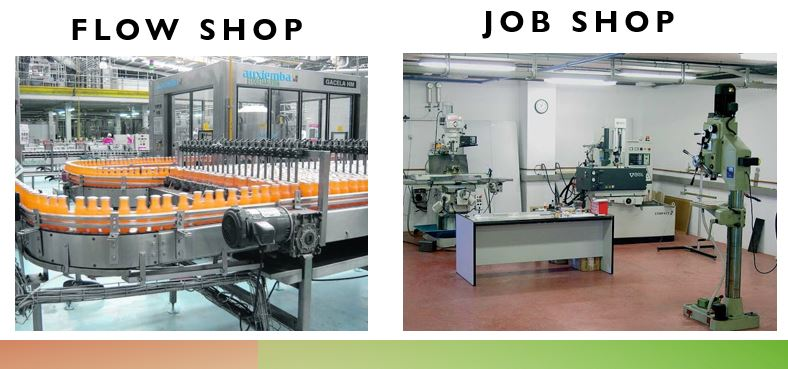

In [ ]:
Image('JobShop.JPG', width=800)

In [26]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Referencias2.JPG to Referencias2.JPG


<p align='justify'> Motivación: En el año 2018 decidí iniciar el estudio del problema de Scheduling en entornos Job Shop. Y publiqué los resultados de mi investigación en IPMU https://link.springer.com/chapter/10.1007/978-3-319-91473-2_66 en su momento realicé la solución de los problemas utilizando GAMS, Lingo y programación lineal. Encontré en Python un enorme potencial para resolver este tipo de problemas y por lo tanto he decidido escoger este problema.  

**Objetivo** : Realizar un desarollo de herurísticas y algoritmos para resolver problemas de Job Shop y escalarlos hasta llegar al la teoría de conjuntos difusos (Fuzzy Sets)
</p>

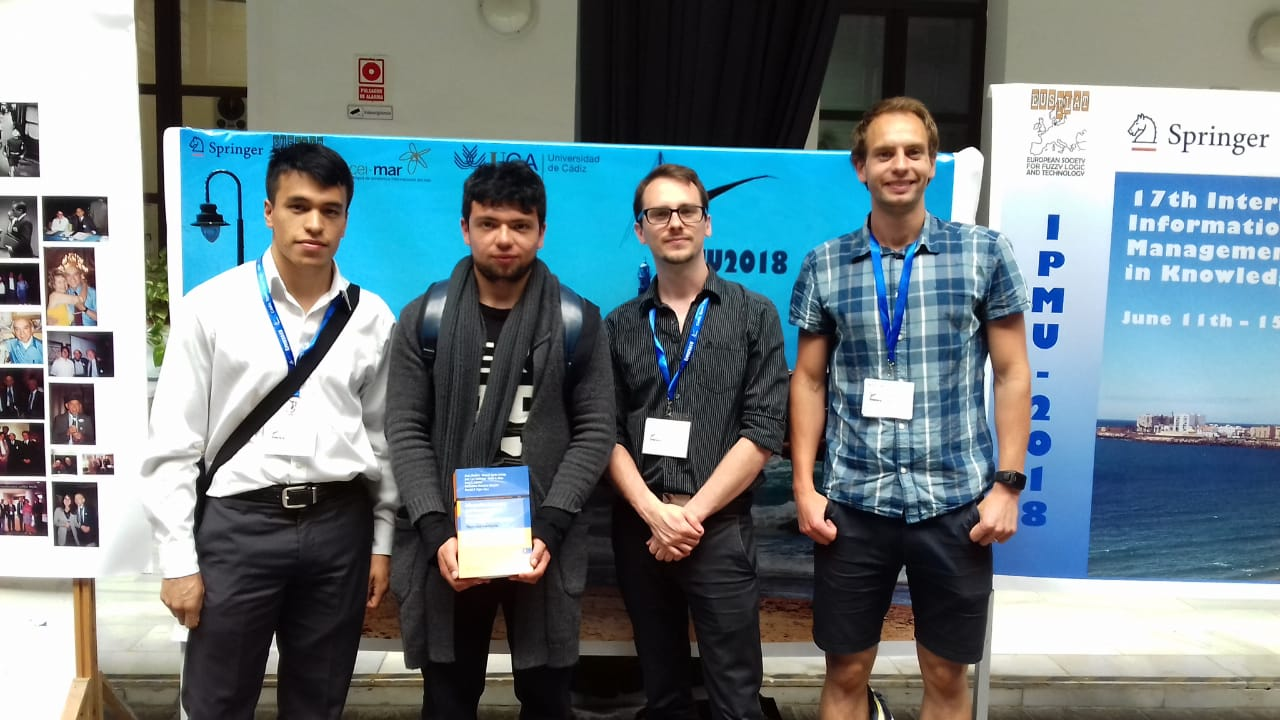

In [ ]:
Image('IPMU2018.jpg', width=800)

Como primera instancia se instalan los paqutes para desarrollar los diagramas de Gantt y el entorno Pyomo. Pyomo permite la formulación y solución de problemas de optimización , en este caso para la minimización de una función de tiempo cuya variable principal se conoce en la literatura como $Makespan$ . Particularmente los modelos se pueden inicializar con datos y matricez, permitiendo el uso de Variables de decisión, funciones objetivo, restricciones , ecuaciones. etc. 


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
import pandas as pd

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *
from pyomo.gdp import *

Existen diversas técnicas en la literatura para resolver el problema de Job Shop, desde programación lineal, programación dinámica, heurísticas, meta-heurísticas y algoritmos evolutivos. Búsquedas exhaustivas. 
En este proyecto se resolverá a través de Pyomo el siguiente modelo matemático.



El modelo matemático a resolver es:

$ z = Min \sum_{j} + d^{+}_{j} -d_{j}^{-}+Ms$

$sujeto \ a$

$x_{gj} +t_{gt} \leq Ms \ \forall \ j \in \mathbf{N}_{n} \ (1) $

$x_{rj} + t_{rj} \leq x_{sj} \ \forall  j \in \mathbf{N}_{n} \ (2)$

$x_{ip} + t_{ip} \leq x_{iq} + M \cdot y_{k} \ \forall i \in \mathbf{N}_{m}, k \in \mathbf{N}_{l} \ (3)$


$x_{iq} + t_{iq} \leq x_{ip} +(1 - y_{k})M \ \forall i \in \mathbf{N}_{m}, k \in \mathbf{N}_{l} \ (4)$

$x_{gj} + t_{gj} + d_{j}^{+} -d_{j}^{-} = d_{j} \ \forall j \in \mathbf{N}_{n} \ (5)$

**Indices**

$i \in \mathbf{N}_{m}$ es el conjunto de las $m$ máquinas que se utilizarán en el sistema

$j \in \mathbf{N}_{n}$ es el conjunto de los $n$ trabajos. 

$k \in \mathbf{N}_{l}$ es el conjunto de los $l$ solapamientos o trabajos conflictivos. 

**Parametros**

$t_{ij} \in \mathbf{R} $ is el tiempo de procesamiento en el j-esimo trabajo en la i-esima maquina

$d_{j} \in \mathbf{R} $ es el tiempo de entrega del trabajo j

$M \in \mathbf{R} $ es una variable de peso (Gran M) utilizada para resolver los solapmientos de dos trabajos.

**Variables de Decisión**

$x_{ij} \in \mathbf{R}$ Es el tiempo de inicio del trabajo j en la maquina i.

$Ms \in \mathbf{R} $ Esta es la variable que mide el Makespan

$yk \in \mathbf{Z} $ es una variable binaria para resolver los conflictos entre los trabajos

$d_{j}^{+} \in \mathbf{R}$ es un adelando en el j-esimo trabajo

$d_{j}^{-} \in \mathbf{R}$ es la tardanza del trabajo j -esimo.

**Explicación de las Restricciones**
En este modelo (1) representa la restricción del Makespan, el Makespan está definido como el timpo total en el que el sistema está activo, sea que estén las máquinas operando en su totalidad o solo algunas de ellas. Esta restricción expone que la sumatoria de los tiempos debe ser menor al Makespan, y esta variable también aparece en la función objetivo. 

La restricción (2) permite establecer que la máquina $r$ precede a la máquina $s$ esta restricción le da una lógica a los procesamientos de los productos. 

Las restricciones (3) y (4) generan la decisión de procesar un trabajo $p$ o un trabajo $q$ los cuales deben ser procesados en la misma máquina. La variable $y_{k}$ opera como una decisión binaria de iniciar un trabajo o no en una máquina en específico. Finalmente la ecuación (5) es una restricción sobre los tiempos de entrega de dichos productos. Puede que un producto se demore más en procesar, pero requira ser entregado más rápido. Se implementarán algunas heurísticas en mención a esta restricción sobre el tipo de procesamiento (FIFO) (LIFO)


**Instancia de Prueba** Del artículo mencionado en [4]  se presenta el siguiente modelo a resolver, se puede ver que a la izquierda están las precedencias. En la matriz t se presentan los tiempos de procesamiento.


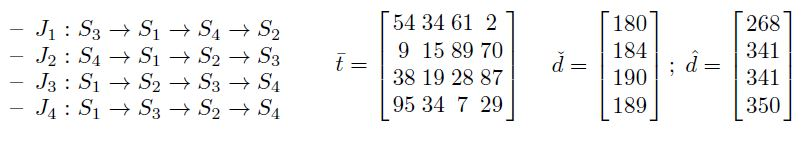

In [ ]:
Image('Instanciaprueba.JPG', width=800)

Resolver este problema 

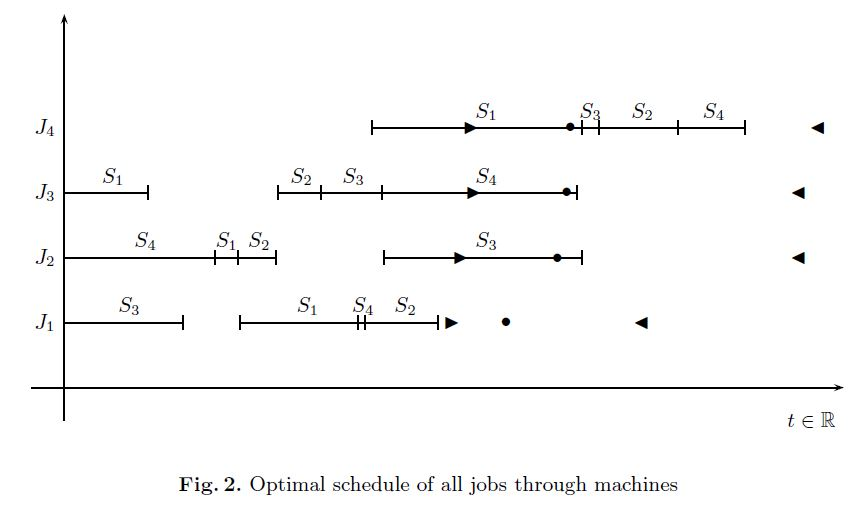

In [ ]:
Image('Ganttbase.JPG', width=800)

In [10]:
JOBS = {
    'J1': {'inicio': 10, 'tprocesamiento': 54, 'duedate': 268},
    'J2': {'inicio': 32, 'tprocesamiento': 9, 'duedate': 341},
    'J3': {'inicio': 50, 'tprocesamiento': 38, 'duedate': 341},
    'J4': {'inicio': 45, 'tprocesamiento': 95, 'duedate': 350},
}
JOBS

{'J1': {'duedate': 268, 'inicio': 10, 'tprocesamiento': 54},
 'J2': {'duedate': 341, 'inicio': 32, 'tprocesamiento': 9},
 'J3': {'duedate': 341, 'inicio': 50, 'tprocesamiento': 38},
 'J4': {'duedate': 350, 'inicio': 45, 'tprocesamiento': 95}}

Un primer acercamiento a la visualización del diagrama de gantt se presenta a continuación, a través de funciones y ciclos se va leyendo los datos generados en JOBs de la celda anterior, luego se va dibujando con determinados parámetros y atributos. 
Este es un primer acercamiento que pretende mostrar ciertas virtudes y dificultades del diagrama


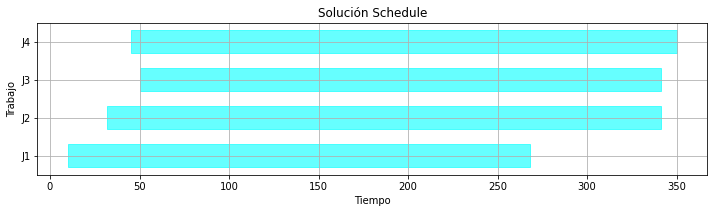

In [ ]:
#Definición de función para la colocación de los trabajos
def gantt(JOBS, SCHEDULE={}):
    bw = 0.3
    plt.figure(figsize=(12, 0.7*(len(JOBS.keys()))))
    idx = 0
    #Llenado de listas para los trabajos que se leen en JOBS y sus principales etiquetas
    for j in sorted(JOBS.keys()):
        x = JOBS[j]['inicio']
        y = JOBS[j]['duedate']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='cyan', alpha=0.6)
        if j in SCHEDULE.keys():
            x = SCHEDULE[j]['Comienzo']
            y = SCHEDULE[j]['Finalizacion']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='blue', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='p')
            plt.text((SCHEDULE[j]['Comienzo'] + SCHEDULE[j]['Finalizacion'])/2.0,idx,
                'Trabajo ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        idx += 1
 # Graficación del diagrama de Gantt
    plt.ylim(-0.5, idx-0.5)
    plt.title('Solución Job Shop')
    plt.xlabel('Tiempo')
    plt.ylabel('Trabajo')
    plt.yticks(range(len(JOBS)), JOBS.keys())
    plt.grid()
    xlim = plt.xlim()
  #Código para dibujar y colorear las barras , respecto a las máquinas ( En este caso 1) 
    if SCHEDULE:
        for j in SCHEDULE.keys():
            if 'Maquina' not in SCHEDULE[j].keys():
                SCHEDULE[j]['Maquina'] = 1
        Maquinas = sorted(set([SCHEDULE[j]['Maquina'] for j in SCHEDULE.keys()]))

        plt.figure(figsize=(12, 0.7*len(Maquinas)))
        for j in sorted(SCHEDULE.keys()):
            idx = Maquinas.index(SCHEDULE[j]['Maquina'])
            x = SCHEDULE[j]['Comienzo']
            y = SCHEDULE[j]['Finalizacion']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='blue', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='p')
            plt.text((SCHEDULE[j]['Comienzo'] + SCHEDULE[j]['Finalizacion'])/2.0,idx,
                'Trabajo ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        plt.xlim(xlim)
        plt.ylim(-0.5, len(MACHINES)-0.5)
        plt.title('Solución Scheduling')
        plt.yticks(range(len(MACHINES)), Maquinas)
        plt.ylabel('Maquina')
        plt.grid()

     
gantt(JOBS)

La presentación del diagrama de Gantt mediante este método no es tan eficiente, el uso de duedates o tiempos de entrega presenta algunas limitaciones en el código. De momento se omiten y se continúa sin dichas ventanas de tiempo. 

Una de las mayores limitantes de los sistemas Job Shop es que tienen predecesores en la producción. Es decir que no se podrán ejecutar ciertas tareas sin antes haberse ejecutado sus prerrequisitos. Por lo tanto se diseña una matriz con los predecesores de cada tarea. Que para este  caso se presentan en la imagen


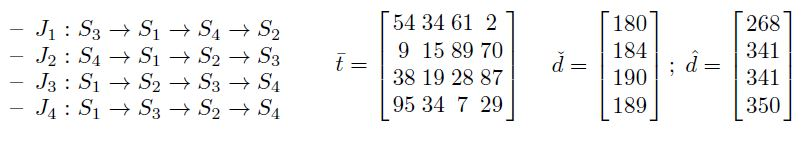

In [ ]:
Image('Instanciaprueba.JPG', width=800)

In [20]:
TASKS = {
    ('Trabajo_1','Maquina_3')  : {'dur': 61, 'prec': None},
    ('Trabajo_1','Maquina_1') : {'dur': 54, 'prec': ('Trabajo_1','Maquina_3')},
    ('Trabajo_1','Maquina_4') : {'dur': 2, 'prec': ('Trabajo_1','Maquina_1')},
    ('Trabajo_1','Maquina_2') : {'dur': 34, 'prec': ('Trabajo_1','Maquina_4')},
    ('Trabajo_2','Maquina_4')  : {'dur': 70, 'prec': None},
    ('Trabajo_2','Maquina_1') : {'dur': 9, 'prec': ('Trabajo_2','Maquina_4')},
    ('Trabajo_2','Maquina_2') : {'dur': 15, 'prec': ('Trabajo_2','Maquina_1')},
    ('Trabajo_2','Maquina_3') : {'dur': 89, 'prec': ('Trabajo_2','Maquina_2')},
    ('Trabajo_3','Maquina_1')  : {'dur': 38, 'prec': None},
    ('Trabajo_3','Maquina_2') : {'dur': 19, 'prec': ('Trabajo_3','Maquina_1')},
    ('Trabajo_3','Maquina_3') : {'dur': 28, 'prec': ('Trabajo_3','Maquina_2')},
    ('Trabajo_3','Maquina_4') : {'dur': 87, 'prec': ('Trabajo_3','Maquina_3')},
    ('Trabajo_4','Maquina_1')  : {'dur': 95, 'prec': None},
    ('Trabajo_4','Maquina_3') : {'dur': 7, 'prec': ('Trabajo_4','Maquina_1')},
    ('Trabajo_4','Maquina_2') : {'dur': 34, 'prec': ('Trabajo_4','Maquina_3')},
    ('Trabajo_4','Maquina_4') : {'dur': 29, 'prec': ('Trabajo_4','Maquina_2')},

}

Recordemos el modelo matemático propuesto

$ z = Min \sum_{j} + d^{+}_{j} -d_{j}^{-}+Ms$

$sujeto \ a$

$x_{gj} +t_{gt} \leq Ms \ \forall \ j \in \mathbf{N}_{n} \ (1) $

$x_{rj} + t_{rj} \leq x_{sj} \ \forall  j \in \mathbf{N}_{n} \ (2)$

$x_{ip} + t_{ip} \leq x_{iq} + M \cdot y_{k} \ \forall i \in \mathbf{N}_{m}, k \in \mathbf{N}_{l} \ (3)$


$x_{iq} + t_{iq} \leq x_{ip} +(1 - y_{k})M \ \forall i \in \mathbf{N}_{m}, k \in \mathbf{N}_{l} \ (4)$

$x_{gj} + t_{gj} + d_{j}^{+} -d_{j}^{-} = d_{j} \ \forall j \in \mathbf{N}_{n} \ (5)$

In [21]:
def jobshop_model(TASKS):
    #Jobs ya está siendo usada para los trabajos, las precedencias las llamaré TASKS o tareas a realizar
    model = ConcreteModel()

    #  Tarea es la variable de decisión con dos índices uno para trabajo (fila) otro para máquina (columna)
    model.TASKS = Set(initialize = TASKS.keys(), dimen=2)
    
    # Extraemos los trabajos de las precedencias diseñadas en el anterior paso
    model.JOBS = Set(initialize = list(set([j for (j,m) in model.TASKS])))
    
    #  Extraemos las máquinas de las precedencias diseñadas en el anterior paso
    model.MACHINES = Set(initialize = list(set([m for (j,m) in model.TASKS])))
    
    # Se hace el producto cruz entre la matriz de precedencia a fin de encontrar las restricciones de posición
    model.TASKORDER = Set(initialize = model.TASKS * model.TASKS, dimen=4, 
        filter = lambda model, j, m, k, n: (k,n) == TASKS[(j,m)]['prec'])
    
    # Se realiza un cruce entre maquinas y trabajos para encontrar solapamientos
    model.DISJUNCTIONS = Set(initialize = model.JOBS * model.JOBS * model.MACHINES, dimen=3,
        filter = lambda model, j, k, m: j < k and (j,m) in model.TASKS and (k,m) in model.TASKS)
    
    # Se cargan los timpos de duración de cada tarea para verificarlos posteriormente
    model.dur = Param(model.TASKS, initialize=lambda model, j, m: TASKS[(j,m)]['dur'])

    # Función para establecer el límite del makespan
    ub = sum([model.dur[j, m] for (j,m) in model.TASKS])
    
    # Escritura de variables de decisión y restricciones
    model.makespan = Var(bounds=(0, ub))
    model.start = Var(model.TASKS, bounds=(0, ub))
    
    model.objective = Objective(expr = model.makespan, sense = minimize)

    model.finish = Constraint(model.TASKS, rule=lambda model, j, m:  
        model.start[j,m] + model.dur[j,m] <= model.makespan)
    
    model.preceding = Constraint(model.TASKORDER, rule=lambda model, j, m, k, n: 
        model.start[k,n] + model.dur[k,n] <= model.start[j,m])
    
    model.disjunctions = Disjunction(model.DISJUNCTIONS, rule=lambda model,j,k,m:
        [model.start[j,m] + model.dur[j,m] <= model.start[k,m], 
         model.start[k,m] + model.dur[k,m] <= model.start[j,m]])
    
    TransformationFactory('gdp.hull').apply_to(model)
    return model

jobshop_model(TASKS)

Se implementa ahora desde Pyomo las iteraciones con el solver de Pyomos, se destaca que se obtendrá una solución factible y no necesariamente óptima, debido a la cantidad de iteraciones.

In [22]:
#Implementacicón de Solver en Pyomos
def jobshop_solve(model):
    SolverFactory('cbc').solve(model)
    results = [{'Trabajo': j,
                'Maquina': m,
                'Inicio': model.start[j, m](), 
                'Tiempo de Procesamiento': model.dur[j,m], 
                'Finalizacion': model.start[(j, m)]() + model.dur[j,m]}
               for j,m in model.TASKS]
    return results

def jobshop(TASKS):
    return jobshop_solve(jobshop_model(TASKS))
#Se devuelven algunas de las iteraciones para ver como está operando el modelo
results = jobshop(TASKS)
results

[{'Finalizacion': 146.0,
  'Inicio': 85.0,
  'Maquina': 'Maquina_3',
  'Tiempo de Procesamiento': 61,
  'Trabajo': 'Trabajo_1'},
 {'Finalizacion': 200.0,
  'Inicio': 146.0,
  'Maquina': 'Maquina_1',
  'Tiempo de Procesamiento': 54,
  'Trabajo': 'Trabajo_1'},
 {'Finalizacion': 202.0,
  'Inicio': 200.0,
  'Maquina': 'Maquina_4',
  'Tiempo de Procesamiento': 2,
  'Trabajo': 'Trabajo_1'},
 {'Finalizacion': 236.0,
  'Inicio': 202.0,
  'Maquina': 'Maquina_2',
  'Tiempo de Procesamiento': 34,
  'Trabajo': 'Trabajo_1'},
 {'Finalizacion': 70.0,
  'Inicio': 0.0,
  'Maquina': 'Maquina_4',
  'Tiempo de Procesamiento': 70,
  'Trabajo': 'Trabajo_2'},
 {'Finalizacion': 142.0,
  'Inicio': 133.0,
  'Maquina': 'Maquina_1',
  'Tiempo de Procesamiento': 9,
  'Trabajo': 'Trabajo_2'},
 {'Finalizacion': 157.0,
  'Inicio': 142.0,
  'Maquina': 'Maquina_2',
  'Tiempo de Procesamiento': 15,
  'Trabajo': 'Trabajo_2'},
 {'Finalizacion': 246.0,
  'Inicio': 157.0,
  'Maquina': 'Maquina_3',
  'Tiempo de Procesamiento

In [23]:
#Para imprimir y visualizar el diagrama de Gantt se escriben en matrices los resultados obtenidos
schedule = pd.DataFrame(results)
#Se trata de buscar en los datos de memoria , las etiquetas determinadas.
print('\nAsignación para trabajos')
print(schedule.sort_values(by=['Trabajo','Inicio']).set_index(['Trabajo', 'Maquina']))

print('\nAsignación para máquinas')
print(schedule.sort_values(by=['Maquina','Inicio']).set_index(['Maquina', 'Trabajo']))


Asignación para trabajos
                     Inicio  Tiempo de Procesamiento  Finalizacion
Trabajo   Maquina                                                 
Trabajo_1 Maquina_3    85.0                       61         146.0
          Maquina_1   146.0                       54         200.0
          Maquina_4   200.0                        2         202.0
          Maquina_2   202.0                       34         236.0
Trabajo_2 Maquina_4     0.0                       70          70.0
          Maquina_1   133.0                        9         142.0
          Maquina_2   142.0                       15         157.0
          Maquina_3   157.0                       89         246.0
Trabajo_3 Maquina_1     0.0                       38          38.0
          Maquina_2    38.0                       19          57.0
          Maquina_3    57.0                       28          85.0
          Maquina_4    85.0                       87         172.0
Trabajo_4 Maquina_1    38.0         

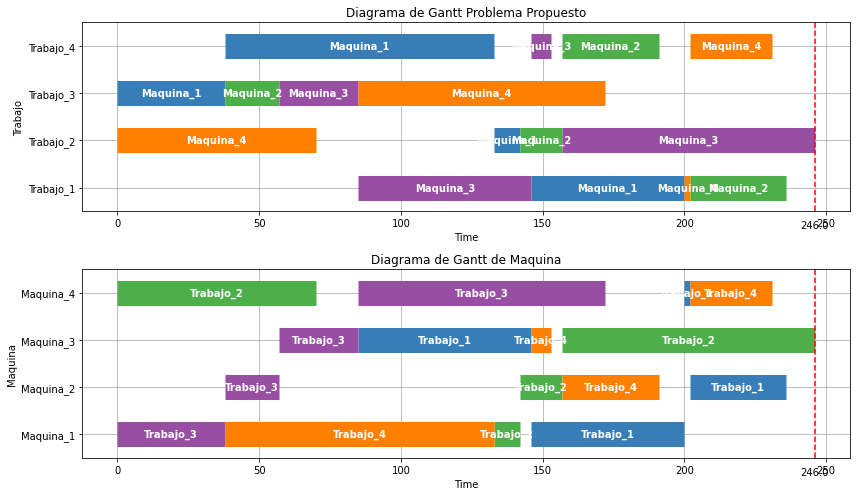

In [24]:
#Se procede a Graficar las dos matrices anteriores
def visualize(results):
    #Se utiliza el entorno gráfico importando al inicio
    schedule = pd.DataFrame(results)
    JOBS = sorted(list(schedule['Trabajo'].unique()))
    MACHINES = sorted(list(schedule['Maquina'].unique()))
    makespan = schedule['Finalizacion'].max()
    #Construcción y forma de las barras
    bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
    text_style = {'color':'white', 'weight':'bold', 'ha':'center', 'va':'center'}
    colors = mpl.cm.Set1.colors
    #Extracción de etiquetas para confirmar los datos
    schedule.sort_values(by=['Trabajo', 'Inicio'])
    schedule.set_index(['Trabajo', 'Maquina'], inplace=True)

    fig, ax = plt.subplots(2,1, figsize=(12, 5+(len(JOBS)+len(MACHINES))/4))
    #Creación de los datos de construcción del diagrama de Gantt
    for jdx, j in enumerate(JOBS, 1):
        for mdx, m in enumerate(MACHINES, 1):
            if (j,m) in schedule.index:
                xs = schedule.loc[(j,m), 'Inicio']
                xf = schedule.loc[(j,m), 'Finalizacion']
                ax[0].plot([xs, xf], [jdx]*2, c=colors[mdx%7], **bar_style)
                ax[0].text((xs + xf)/2, jdx, m, **text_style)
                ax[1].plot([xs, xf], [mdx]*2, c=colors[jdx%7], **bar_style)
                ax[1].text((xs + xf)/2, mdx, j, **text_style)
    #Impresión de los dos diagramas, tanto para trabajos, como para máquinas
    ax[0].set_title('Diagrama de Gantt Problema Propuesto')
    ax[0].set_ylabel('Trabajo')
    ax[1].set_title('Diagrama de Gantt de Maquina')
    ax[1].set_ylabel('Maquina')
    
    for idx, s in enumerate([JOBS, MACHINES]):
        ax[idx].set_ylim(0.5, len(s) + 0.5)
        ax[idx].set_yticks(range(1, 1 + len(s)))
        ax[idx].set_yticklabels(s)
        ax[idx].text(makespan, ax[idx].get_ylim()[0]-0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
        ax[idx].plot([makespan]*2, ax[idx].get_ylim(), 'r--')
        ax[idx].set_xlabel('Time')
        ax[idx].grid(True)
        
    fig.tight_layout()

visualize(results)

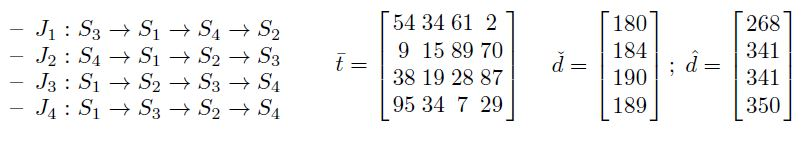

In [ ]:
Image('Instanciaprueba.JPG', width=800)
#Puede comparar la satisfacción de las restricciones

Puede verificar que en efecto se ha satisfecho las restricciones en este caso.
# **Implementación Final**

En el siguiente enlace encuentra un repositorio con casos de práctica para Scheduling

http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/jobshop1.txt

De las primeras soluciones para problemas de este tipo, Cook and Applegate presentaron en la década de los 90's soluciones que duraban varias horas.

A continuación se ejecuta el programa realizado con una matriz de prueba


In [25]:
data = """
 6  9 1 81 4 55 2 40 8 32 3 37 0  6 5 19 9 81 7 40
 7 21 2 70 9 65 4 64 1 46 5 65 8 25 0 77 3 55 6 15
 2 85 5 37 0 40 3 24 1 44 6 83 4 89 8 31 7 84 9 29
 4 80 6 77 7 56 0  8 2 30 5 59 3 38 1 80 9 41 8 97
 0 91 6 40 4 88 1 17 2 71 3 50 9 59 8 80 5 56 7  7
 2  8 6  9 3 58 5 77 1 29 8 96 0 45 9 10 4 54 7 36
 4 70 3 92 1 98 5 87 6 99 7 27 8 86 9 96 0 28 2 73
 1 95 7 92 3 85 4 52 6 81 9 32 8 39 0 59 2 41 5 56
 3 60 8 45 0 88 2 12 1  7 5 22 4 93 9 49 7 69 6 27
 0 21 2 61 3 68 5 26 6 82 9 71 8 44 4 99 7 33 1 84
"""
#Ejecutar el método iterativo proppuesto
TASKS = {}
for job, line in enumerate(data.splitlines()[1:]):
    nums = line.split()
    prec = None
    for m, dur in zip(nums[::2], nums[1::2]):
        task = (f"J{job}",f"M{m}")
        TASKS[task] = {'dur':int(dur), 'prec':prec}
        prec = task
    
#pd.DataFrame(TASKS).T

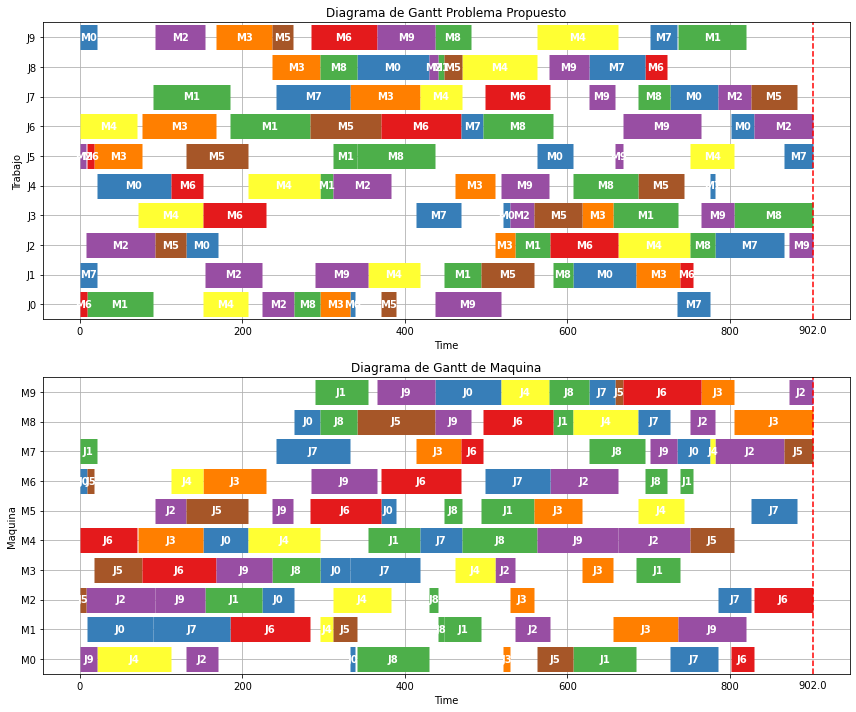

In [18]:
def jobshop_solve_neos(model):
  #Una mejor solución se puede obtener corriendo el programa en NEOS 
    solver_manager = SolverManagerFactory('neos') # Visite su página https://neos-server.org/neos/
    solver_manager.solve(model, opt='cplex')
    results = [{'Trabajo': j,
                'Maquina': m,
                'Inicio': model.start[j, m](), 
                'Tiempo de Procesamiento': model.dur[j,m], 
                'Finalizacion': model.start[(j, m)]() + model.dur[j,m]}
               for j,m in model.TASKS]
    return results

model = jobshop_model(TASKS)
results = jobshop_solve_neos(model)
visualize(results)

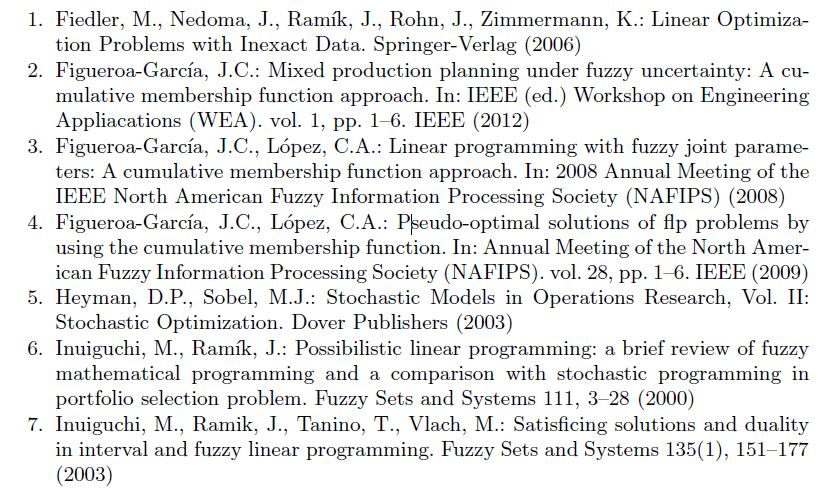

In [25]:
Image('Referencia1.JPG', width=700)

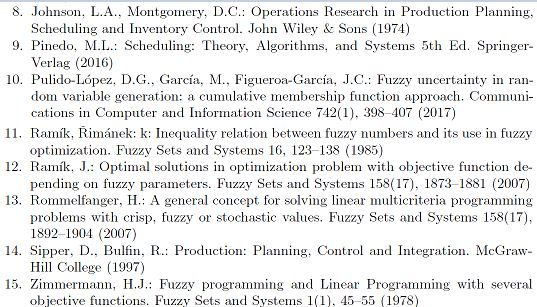

In [27]:
Image('Referencias2.JPG', width=700)